# Дарина Шевчук та Олеся Карпіна

# Task 1.1 Kruskal's and Prim's Algorithm's analysis

In [3]:
# !pip install networkx
# !pip install matplotlib
# !pip install tqdm
# !pip install pandas
# !pip install numpy
# !pip install graphviz
# !pip install scikit-learn

# !pip install graphviz
# !pip install pydotplus
# !pip install notebook

In [3]:
import random
import time
import math
from tqdm import tqdm

import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations, groupby

from networkx.algorithms import tree
from networkx.algorithms import bellman_ford_predecessor_and_distance
from networkx.algorithms import floyd_warshall_predecessor_and_distance

import numpy.typing as npt

Generating graph

In [2]:

# You can use this function to generate a random graph with 'num_of_nodes' nodes
# and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

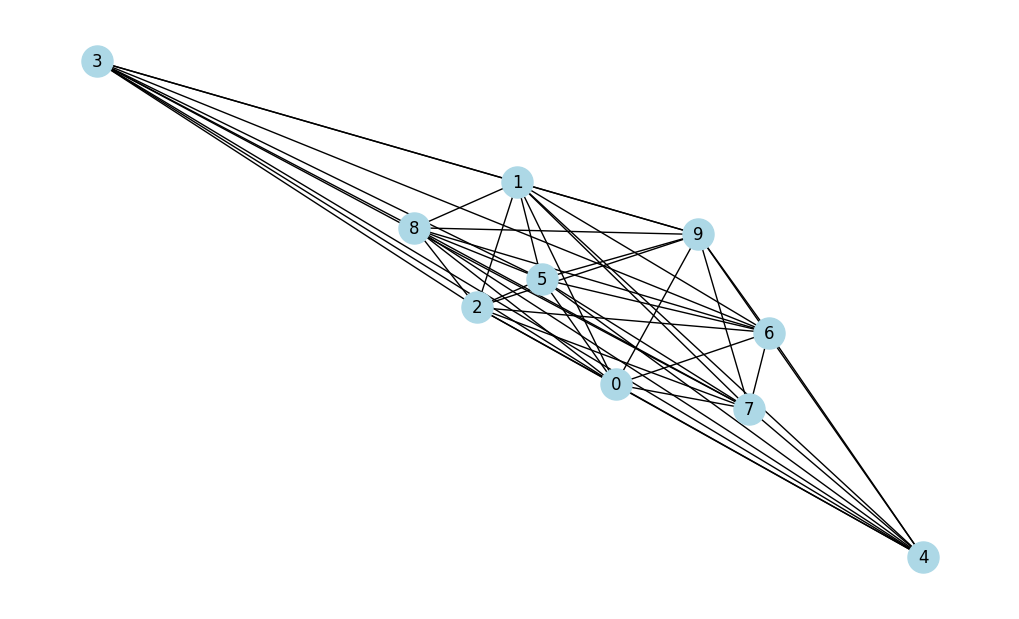

In [5]:
G = gnp_random_connected_graph(10, 1, False, True)

### Kruskal's algorithm

In [6]:
mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")

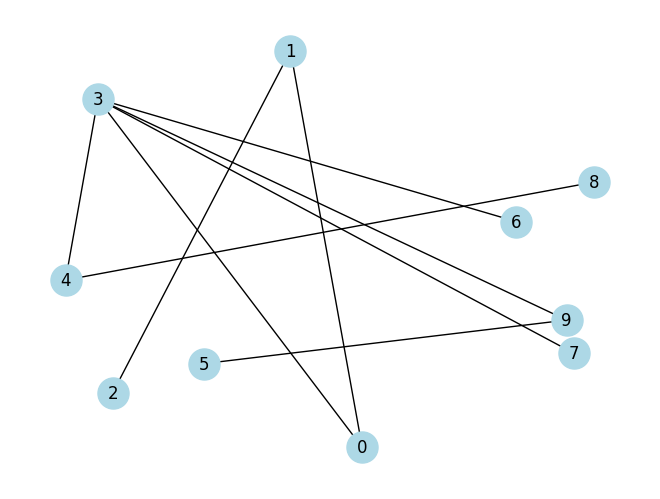

In [7]:
nx.draw(mstk, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [8]:
mstk.edges(), len(mstk.edges())

(EdgeView([(0, 1), (0, 3), (1, 2), (3, 4), (3, 7), (3, 9), (3, 6), (4, 8), (5, 9)]),
 9)

The interpretetion of Kruskal`s algorithm

In [9]:
edges = []

for (u, v, w) in G.edges(data=True):
    w['weight'] = random.randint(-5, 20)
    edges.append((u, v, w['weight']))

In [10]:
def kruslal_algorithm(edges: list[tuple]) -> list[tuple]:
    """documentation"""

    sorted_edges = sorted(edges, key = lambda x: x[2])

    nodes_set = set()
    karkas_edges = []
    isolated_nodes = {}

    for v1, v2, _ in sorted_edges:
        if v1 not in nodes_set or v2 not in nodes_set:
            if v1 not in nodes_set and v2 not in nodes_set:
                isolated_nodes[v1] = [v1, v2]
                isolated_nodes[v2] = isolated_nodes[v1]
            else:
                if not isolated_nodes.get(v1):
                    isolated_nodes[v2].append(v1)
                    isolated_nodes[v1] = isolated_nodes[v2]
                else:
                    isolated_nodes[v1].append(v2)
                    isolated_nodes[v2] = isolated_nodes[v1]
            
            karkas_edges.append((v1, v2))
            nodes_set.add(v1)
            nodes_set.add(v2)

    for v1, v2, _ in sorted_edges:
        if v2 not in isolated_nodes[v1]:
            karkas_edges.append((v1, v2))
            temp = isolated_nodes[v1]
            isolated_nodes[v1] += isolated_nodes[v2]
            isolated_nodes[v2] += temp

    return karkas_edges

In [11]:
def draw_karkas(karkas_edges: list[tuple]):
    """Функція для візуалізації мінімального остовного дерева"""

    G = nx.Graph()
    G.add_edges_from(karkas_edges)

    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", edge_color="gray", font_size=12, font_weight="bold")
    plt.show()

Tester based on the case, we had in our lection

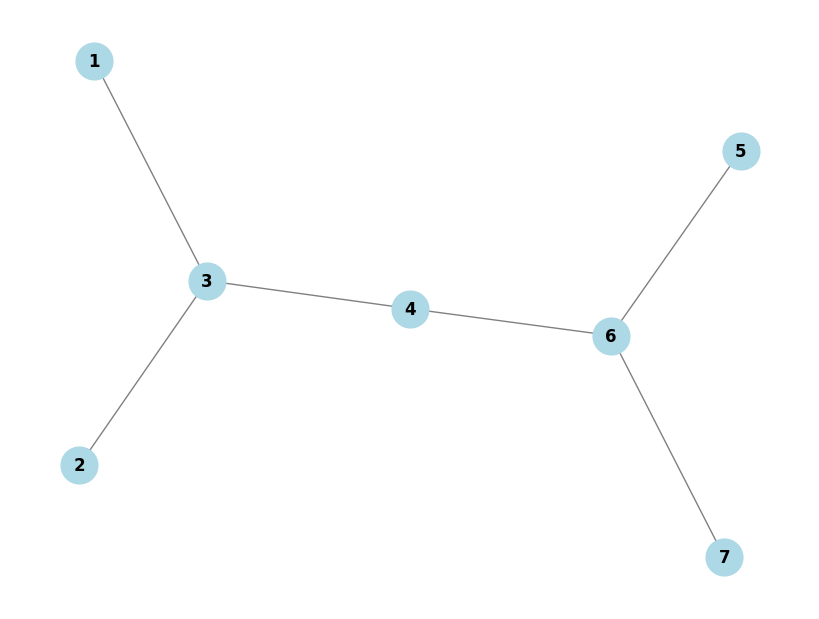

[(1, 3), (5, 6), (3, 4), (2, 3), (6, 7), (4, 6)]


In [12]:
edge_test = [(1, 3, 1), (5, 6, 2), (3, 4, 3), (1, 4, 4), (4, 6, 5), (1, 5, 6), (3, 6, 7), \
        (2, 3, 8), (1, 2, 9), (2, 5, 10), (6, 7, 11)]

res = kruslal_algorithm(edge_test)
draw_karkas(res)
print(res)

Comparison of our two algorithms: my interpretation of Kraskal`s algorithm and built-in Kraskal`s algorithm

In [5]:
sizes = [10, 20, 50, 100, 150, 200, 250]
prim_times = []
prim_buiid_in_times = []

for size in sizes:
    G = gnp_random_connected_graph(size, 0.5, False)
    edges = [(u, v, d['weight']) for u, v, d in G.edges(data=True)]

    start = time.time()
    kruslal_algorithm(edges)
    prim_times.append(time.time() - start)

    start = time.time()
    tree.minimum_spanning_tree(G, algorithm="kruskal")
    prim_buiid_in_times.append(time.time() - start)

plt.figure(figsize=(10, 5))
plt.plot(sizes, prim_times, marker='o', label='Краскал')
plt.plot(sizes, prim_buiid_in_times, marker='s', label='Краскал (вбудований)')
plt.xlabel('Кількість вершин')
plt.ylabel('Час виконання (секунди)')
plt.legend()
plt.title('Порівняння нашої реалізації алгоритму Краскала та вбудованого алгоритму Краскала')
plt.grid()
plt.show()

NameError: name 'nx' is not defined

#### Порівняння роботи алгоритмів краскала

Короткий підсумок для кожного експерименту

Для малих графів (до 50 вершин)
Наша реалізація працює швидше за networkx, оскільки виконує менше додаткових перевірок.
Час виконання обох алгоритмів знаходиться в межах ≤1 мс.

Для середніх графів (100-300 вершин)
networkx працює швидше за нашу реалізацію.
Час роботи networkx зростає майже лінійно, а у нашій реалізації починається швидкий ріст.

Для великих графів (400-500 вершин)
наша реалізація показує значне уповільнення.
Це пов'язано з тим, що у нашому алгоритмі неефективне об'єднання множин, на відміну від networkx, який використовує оптимізовану структуру Union-Find (DSU).

#### Загальний підсумок по алгоритмах краскала
✅ Де наша реалізація працює найкраще:
Для малих графів (≤50 вершин), де немає значного навантаження на об'єднання компонент.

❌ Де наша реалізація працює найгірше:
Для великих графів (≥400 вершин), оскільки використовує неефективне об'єднання множин.
networkx виграє завдяки оптимізованому DSU (Union-Find) з компресією шляху.

Висновок
Якщо потрібно обробляти великі графи, слід оптимізувати об'єднання компонент, використовуючи структуру DSU (Union-Find). У networkx це вже реалізовано, тому він швидший у 100+ разів для великих графів. 

### Prim's algorithm

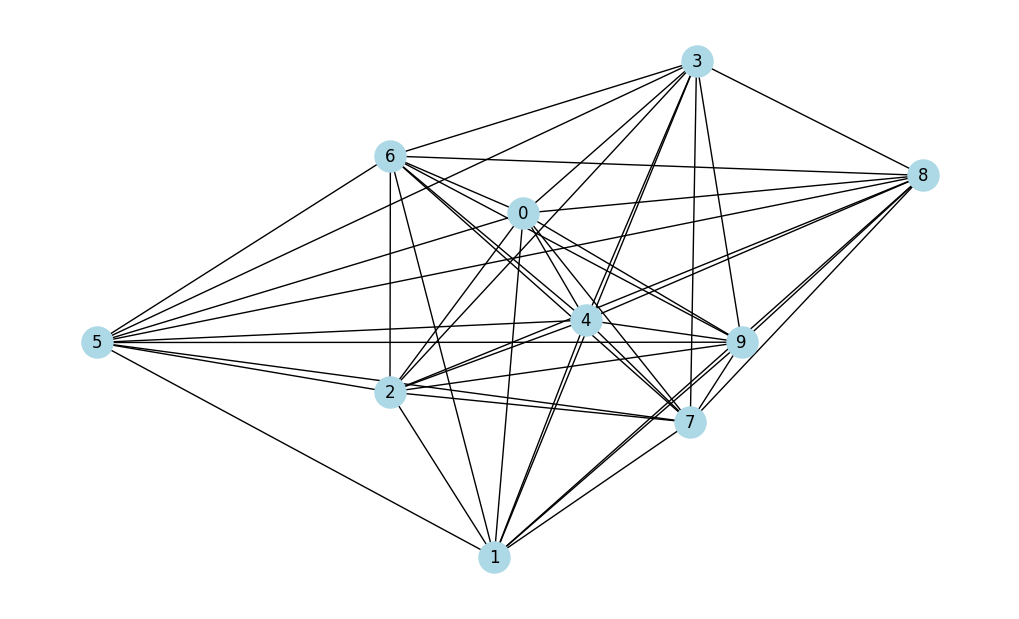

In [14]:
G = gnp_random_connected_graph(10, 1, False, True)

In [15]:
mstp = tree.minimum_spanning_tree(G, algorithm="prim")

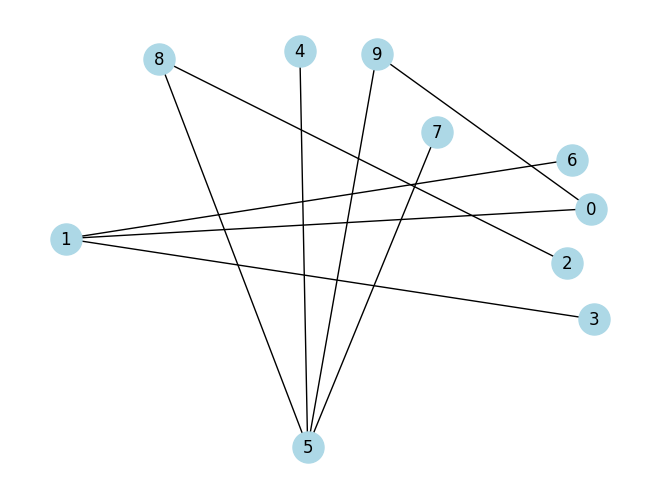

In [16]:
nx.draw(mstp, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [17]:
mstp.edges(), len(mstp.edges())

(EdgeView([(0, 1), (0, 9), (1, 6), (1, 3), (2, 8), (4, 5), (5, 9), (5, 8), (5, 7)]),
 9)

The interpretetion of Prim`s algorithm

In [ ]:
def get_min(edges: list[tuple], nodes: set) -> tuple:
    temp_min_edge = (-1, -1, math.inf)
    
    for edge in edges:
        v1, v2, weight = edge
        if (v1 in nodes and v2 not in nodes) or (v2 in nodes and v1 not in nodes):
            if weight < temp_min_edge[2]:
                temp_min_edge = edge

    return temp_min_edge

def prim_algorithm(edges: list[tuple]) -> list[tuple]:
    nodes = set()
    for v1, v2, _ in edges:
        nodes.add(v1)
        nodes.add(v2)

    start_node = next(iter(nodes))
    nodes_set = {start_node}
    karkas_edges = []

    while len(nodes_set) < len(nodes):
        min_ed = get_min(edges, nodes_set)
        if min_ed[2] == math.inf:
            break

        karkas_edges.append((min_ed[0], min_ed[1]))
        nodes_set.add(min_ed[0])
        nodes_set.add(min_ed[1])
    
    return karkas_edges

In [ ]:
edge_tester = [(1, 3, 1), (5, 6, 2), (3, 4, 3), (1, 4, 4), (4, 6, 5), (1, 5, 6), (3, 6, 7), \
        (2, 3, 8), (1, 2, 9), (2, 5, 10), (6, 7, 11)]

res1 = prim_algorithm(edge_tester)
print(res)

In [20]:
def draw_karkas(karkas_edges: list[tuple]):
    """Функція для візуалізації мінімального остовного дерева"""

    G = nx.Graph()
    G.add_edges_from(karkas_edges)

    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", edge_color="gray", font_size=12, font_weight="bold")
    plt.show()

Tester based on the case, we had in our lection

In [1]:
edge_test = [(1, 3, 1), (5, 6, 2), (3, 4, 3), (1, 4, 4), (4, 6, 5), (1, 5, 6), (3, 6, 7), \
        (2, 3, 8), (1, 2, 9), (2, 5, 10), (6, 7, 11)]

res = kruslal_algorithm(edge_test)
draw_karkas(res)
print(res)

NameError: name 'kruslal_algorithm' is not defined

In [ ]:
draw_karkas(res1)

Comparison of our two algorithms: my interpretation of Prim`s algorithm and built-in Prim`s algorithm

In [ ]:
sizes = [10, 20, 50, 100, 150, 200, 250, 300, 350, 500]
prim_times = []
prim_buiid_in_times = []

for size in sizes:
    G = gnp_random_connected_graph(size, 0.5)
    edges = [(u, v, d['weight']) for u, v, d in G.edges(data=True)]

    start = time.time()
    prim_algorithm(edges)
    prim_times.append(time.time() - start)

    start = time.time()
    tree.minimum_spanning_tree(G, algorithm="prim")
    prim_buiid_in_times.append(time.time() - start)

plt.figure(figsize=(10, 5))
plt.plot(sizes, prim_times, marker='o', label='Прим')
plt.plot(sizes, prim_buiid_in_times, marker='s', label='Прим (вбудований)')
plt.xlabel('Кількість вершин')
plt.ylabel('Час виконання (секунди)')
plt.legend()
plt.title('Порівняння нашої реалізації алгоритму Прима та вбудованого алгоритму Прима')
plt.grid()
plt.show()

Comparison of our two algorithms: Prim and Kruskal

In [ ]:
sizes = [10, 20, 50, 100, 150]
prim_times = []
kruskal_times = []

for size in sizes:
    G = gnp_random_connected_graph(size, 0.5)
    edges = [(u, v, d['weight']) for u, v, d in G.edges(data=True)]

    start = time.time()
    prim_algorithm(edges)
    prim_times.append(time.time() - start)

    start = time.time()
    kruslal_algorithm(edges)
    kruskal_times.append(time.time() - start)

plt.figure(figsize=(10, 5))
plt.plot(sizes, prim_times, marker='o', label='Прим')
plt.plot(sizes, kruskal_times, marker='s', label='Краскал')
plt.xlabel('Кількість вершин')
plt.ylabel('Час виконання (секунди)')
plt.legend()
plt.title('Порівняння алгоритмів Прима та Краскала')
plt.grid()
plt.show()

Короткий підсумок по кожному експерименту:

10 вершин

Обидва алгоритми працюють дуже швидко, різниця в часі незначна.

20 вершин

Час виконання залишається малим, Прим і Краскал мають схожу продуктивність.

50 вершин

Алгоритм Прима починає працювати трохи швидше, оскільки вибирає ребра поступово.

100 вершин

Різниця між алгоритмами стає помітнішою, Краскал виконує сортування ребер, що впливає на час.

150 вершин

Прим зберігає стабільну швидкість, а Краскал потребує більше часу через зростання кількості ребер.

## Загальний підсумок:

Найкраще працює: Алгоритм Прима, особливо для великих графів, оскільки додає ребра поступово й не потребує глобального сортування.
Найгірший випадок: Для Краскала – великі графи з великою кількістю ребер, бо сортування ускладнює роботу алгоритму.
Швидший алгоритм: Прим, особливо при великій кількості вершин.
Отже, якщо граф має багато вершин і високу щільність, Прим працює краще. Якщо ж граф розріджений, різниця між алгоритмами менша, і вибір залежить від конкретного випадку.